In [1]:
from src.NMR_predict import GPR_NMR

In [2]:
# Define path to xyz files and path to SOAP files

XYZ_directory = ['/home/alex/Pt_NMR/data/structures/train_split/',
                 '/home/alex/Pt_NMR/data/structures/test_split/']

SOAP_directory = ['/home/alex/Pt_NMR/data/representations/SOAP/train/',
                  '/home/alex/Pt_NMR/data/representations/SOAP/test/']

target_path = ['/home/alex/Pt_NMR/data/labels/train_test_split/indexed_targets_train.csv',
               '/home/alex/Pt_NMR/data/labels/train_test_split/indexed_targets_test.csv']

# Define list of SOAP params [r_cut, n_max, l_max]
params = [2.0, 1, 5]

# Create instance of GPR_NMR class
pt_gpr = GPR_NMR(descriptor_path=SOAP_directory, descriptor_type='SOAP',
                 descriptor_params=params, central_atom='Pt', mode ='write',
                 xyz_path=XYZ_directory, xyz_base='st_', target_path=target_path)


Outliers (8):
------------
Compound Name: cis-Pt(N,N-(Me)4en)Cl2, Observed: -2386, Predicted: -2102.77401787551, Residual: -283.2259821244902
Compound Name: cis-Pt(N,N-(Me)2en)Cl2, Observed: -2433, Predicted: -2146.6030835051406, Residual: -286.3969164948594
Compound Name: [Pt(CN)4]-2, Observed: -4746, Predicted: -3287.6035008990375, Residual: -1458.3964991009625
Compound Name: trans-PtCl(SnCl3)(PEt3)2, Observed: -4780, Predicted: -4479.256446471851, Residual: -300.7435535281493
Compound Name: trans-PtH(SnCl3)(PEt3)2, Observed: -5302, Predicted: -4218.777362578636, Residual: -1083.2226374213642
Compound Name: [Pt(SCN)3(SbMe3)]-, Observed: -4374, Predicted: -3948.22867655338, Residual: -425.77132344662004
Compound Name: [Pt(NCS)(SCN)2(SbMe3)]-, Observed: -3935, Predicted: -3511.618308761829, Residual: -423.3816912381708
Compound Name: trans-[Pt(PEt3)2Cl2], Observed: -3938, Predicted: -4238.14286085648, Residual: 300.1428608564802


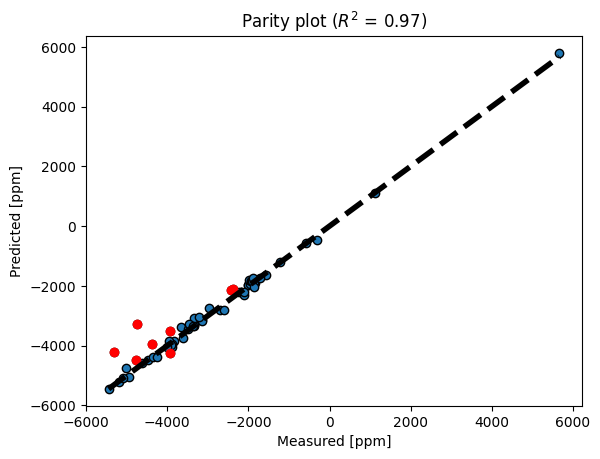

Empirical coverage of model for holdout set: 0.0
Errors on holdout test set (Backend: sklearn): 
-----------------------------------------
MAE: 152.0142431162997 [ppm]
RMSE: 278.26551750189947 [ppm]
-----------------------------------------
CV errors and stdev on training set (Backend: sklearn):
(128.87434216944624, 20.08253642212598, 189.23519207215966, 40.121783943008836, None) 

Errors on holdout test set (Backend: GPyTorch): 
-----------------------------------------
MAE: 153.78812000333318 [ppm]
RMSE: 265.0044891451158 [ppm]
-----------------------------------------
CV errors and stdev on training set (Backend: GPyTorch):
(133.6604461669922, 26.425628662109375, 192.48284912109375, 26.425628662109375)


In [3]:
# Use predict function for GPR and obtaining CV prediction errors
errors_std = pt_gpr.GPR_train(kernel_degree=2, noise=1e-3, noise_estim=False, lc=False)
test_errors = pt_gpr.GPR_test(kernel_degree=2, noise=1e-3, parity_plot=True, ecp=True)

print('CV errors and stdev on training set (Backend: sklearn):')
print(errors_std, '\n')

#Testing K-fold with GPyTorch

gpytorch_errors = pt_gpr.GPR_train_gpytorch(kernel_degree=2, noise=1e-3, n_splits=4, noise_estim=False)
gpytorch_test_errors = pt_gpr.GPR_test_gpytorch(kernel_degree=2, noise=1e-3)

print('CV errors and stdev on training set (Backend: GPyTorch):')
print(gpytorch_errors)


In [2]:
XYZ_directory = ['/home/alex/Pt_NMR/data/structures/train_split/',
                 '/home/alex/Pt_NMR/data/structures/test_split/']

APE_RF_directory = ['/home/alex/Pt_NMR/data/representations/APE_RF/train/',
                  '/home/alex/Pt_NMR/data/representations/APE_RF/test/']

target_path = ['/home/alex/Pt_NMR/data/labels/train_test_split/indexed_targets_train.csv',
               '/home/alex/Pt_NMR/data/labels/train_test_split/indexed_targets_test.csv']

# Define list of SOAP params [r_cut, n_max, l_max]
params = [2.8, 500]

# Create instance of GPR_NMR class
pt_gpr = GPR_NMR(descriptor_path=APE_RF_directory, descriptor_type='APE-RF',
                 descriptor_params=params, central_atom='Pt', mode ='write',
                 xyz_path=XYZ_directory, xyz_base='st_', target_path=target_path)

In [3]:
# Use predict function for GPR and obtaining CV prediction errors
errors_std = pt_gpr.GPR_train(kernel_degree=0, noise=10.0, noise_estim=True, lc=False)
test_errors = pt_gpr.GPR_test(kernel_degree=0, noise=10.0, parity_plot=True, ecp=True)

print('CV errors and stdev on training set (Backend: sklearn):')
print(errors_std, '\n')

#Testing K-fold with GPyTorch

gpytorch_errors = pt_gpr.GPR_train_gpytorch(kernel_degree=2, noise=10.0, n_splits=4, noise_estim=False)
gpytorch_test_errors = pt_gpr.GPR_test_gpytorch(kernel_degree=2, noise=10.0)

print('CV errors and stdev on training set (Backend: GPyTorch):')
print(gpytorch_errors)


AttributeError: 'RBF' object has no attribute 'k2'

In [6]:
XYZ_directory = ['/home/alex/Pt_NMR/data/structures/train_split/',
                 '/home/alex/Pt_NMR/data/structures/test_split/']

SIF_directory = ['/home/alex/Pt_NMR/data/representations/SIF/train/',
                  '/home/alex/Pt_NMR/data/representations/SIF/test/']

target_path = ['/home/alex/Pt_NMR/data/labels/train_test_split/indexed_targets_train.csv',
               '/home/alex/Pt_NMR/data/labels/train_test_split/indexed_targets_test.csv']

# Define list of params (names of structure-indpendent features to include in this case)
params = ['EN', 'alpha', 'val', 'qmol']

# Create instance of GPR_NMR class for training (CV) and testing on holdout
pt_gpr = GPR_NMR(descriptor_path=SIF_directory, descriptor_type='SIF',
                 descriptor_params=params, central_atom='Pt', mode ='write',
                 xyz_path=XYZ_directory, xyz_base='st_', target_path=target_path)

/home/alex/anaconda3/envs/Pt_NMR/lib/python3.10/site-packages/sklearn/gaussian_process/kernels.py:452: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__noise_level is close to the specified upper bound 100000.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(
/home/alex/anaconda3/envs/Pt_NMR/lib/python3.10/site-packages/sklearn/gaussian_process/kernels.py:452: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__noise_level is close to the specified upper bound 100000.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(
/home/alex/anaconda3/envs/Pt_NMR/lib/python3.10/site-packages/sklearn/gaussian_process/_gpr.py:659: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_res

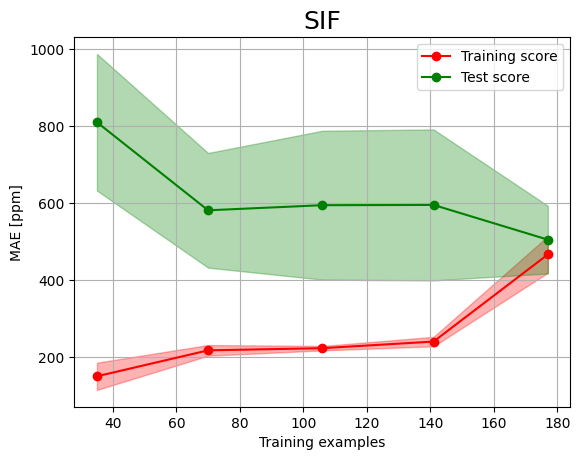

Outliers (13):
------------
Compound Name: [Pt(CN)4]-2, Observed: -4746, Predicted: -3977.777773709338, Residual: -768.2222262906621
Compound Name: trans-PtI(SiH2Cl)(PEt3)2, Observed: -5198, Predicted: -6302.436632108777, Residual: 1104.4366321087773
Compound Name: trans-PtCl(SnCl3)(PEt3)2, Observed: -4780, Predicted: -5707.049064944823, Residual: 927.0490649448229
Compound Name: trans-PtH(SnCl3)(PEt3)2, Observed: -5302, Predicted: -6551.980302811094, Residual: 1249.9803028110937
Compound Name: cis-Pt(SCN)2(SbMe3)2, Observed: -4950, Predicted: -6039.359294805472, Residual: 1089.359294805472
Compound Name: cis-Pt(Me2en)2(Ox), Observed: -1988, Predicted: -1291.932934607278, Residual: -696.067065392722
Compound Name: cis-Pt(Me2en)2(benzmal), Observed: -1926, Predicted: -1291.932934607278, Residual: -634.067065392722
Compound Name: cis-Pt(Me4en)2(benzmal), Observed: -1930, Predicted: -1291.932934607278, Residual: -638.067065392722
Compound Name: [PtBrF5] 2-, Observed: 5669, Predicted: 3412

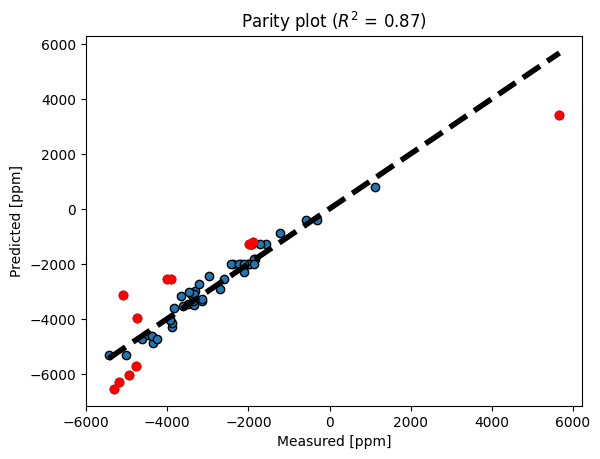

Empirical coverage of model for holdout set: 0.7666666666666667
Errors on holdout test set:
----------------------------
MAE: 426.7117230535609 [ppm]
RMSE: 630.2546717624384 [ppm]
----------------------------


In [7]:
# Call GPR_train function to obtain cross-validated errors on training set
# Create learning curve and estimate data noise for reliable uncertainties
errors_std = pt_gpr.GPR_train(kernel_degree=2, noise=0.01, noise_estim=True, lc=True)

# Call GPR_test function to obtain mean error on holdout test set
# Create parity plot and compute empirical coverage probability
test_errors = pt_gpr.GPR_test(kernel_degree=2, noise=0.01, parity_plot=True, ecp=True)
